In [115]:
# imports
import sympy as sp
from sympy import Matrix, MatrixSymbol
sp.init_printing()
import matplotlib.pyplot as plt
import numpy as np
import mpmath

In [116]:
# constants
Lc=sp.Symbol('L_c')
Lc=1 #CHANGEABLE

In [117]:
# dimensional parameters
n=sp.Symbol('n')
n=1023 #CHANGEABLE
A=sp.Symbol('A')
A=-4 #CHANGEABLE
B=sp.Symbol('B')
B=4 #CHANGEABLE
S=sp.Symbol('S')
S=(B-A)/(n+1)

In [118]:
# non-dimensional parameters
a=sp.Symbol('a')
a=A/Lc
b=sp.Symbol('b')
b=B/Lc
s=sp.Symbol('s')
s=S/Lc
SF=10 #Scale Factor for the graphs - CHANGEABLE

In [119]:
# non-dimensional grid
xi=sp.Symbol('x_i')
xi=np.linspace(a+s,b-s,n)

In [120]:
# non-dimensional Quantum Harmonic Oscillator potential
v=sp.Function('v')
def V(X):
    return X**2
vi=sp.Symbol('v_i')
vi=V(xi)

In [121]:
# auxiliary variables
vit=sp.Symbol('\widetilde{v_i}')
vit=s*s*vi

In [122]:
# hamiltonian operator
H=sp.MatrixSymbol('H',n,n)
H= -1*np.eye(n,n,k=-1) + (2+vit)*np.eye(n,n) + -1*np.eye(n,n,k=1)

In [123]:
# eigenvalues and eigenvectors
eigval=np.linalg.eigh(H)[0]/(s*s)
eigvec=np.linalg.eigh(H)[1]*SF
(eigval[0])

In [124]:
# transpose eigvec to operate on an easier to use array
Psi=eigvec.T

Text(0, 0.5, '$\\psi_n(x)$')

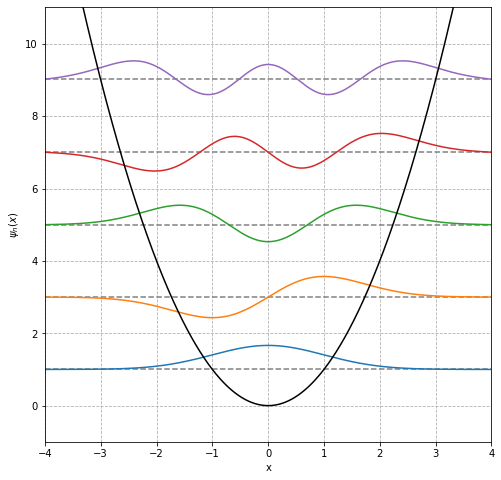

In [125]:
# graph of QHO eigenstates
fig,ax=plt.subplots(figsize=(8,8))
i=0
for i in range(0,5):
    if(i%4==0 or i%4==1): plt.plot(xi,Psi[i]+eigval[i])
    else: plt.plot(xi,-Psi[i]+eigval[i])
    plt.hlines(eigval[i],A,B,color='grey',ls='--')
plt.plot(xi,vi,color='black')
plt.xlim(A,B)
plt.ylim(-1,eigval[i]+2)
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi_n(x)$')

Text(0, 0.5, '$\\psi^2_n(x)$')

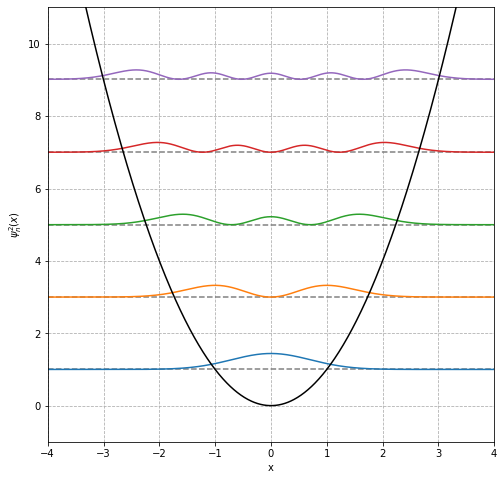

In [126]:
# graph of QHO eigenstates probability densities
fig,ax=plt.subplots(figsize=(8,8))
i=0
for i in range(0,5):
    plt.plot(xi,(Psi[i]**2+eigval[i]))
    plt.hlines(eigval[i],A,B,color='grey',ls='--')
plt.plot(xi,vi,color='black')
plt.xlim(A,B)
plt.ylim(-1,eigval[i]+2)
plt.grid(ls='--')
ax.set_xlabel('x')
ax.set_ylabel('$\psi^2_n(x)$')